<a href="https://colab.research.google.com/github/STARK-yv/Machine_Learning/blob/main/Wine%20Quality%20Analysis/wine_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np    
import matplotlib
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_csv("/content/sample_data/wine.csv",sep=";")
print("Successfully imported data into console" )
df.head(6)


Successfully imported data into console


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
df.shape

(4898, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
fig = px.histogram(df,x='quality')
fig.show()

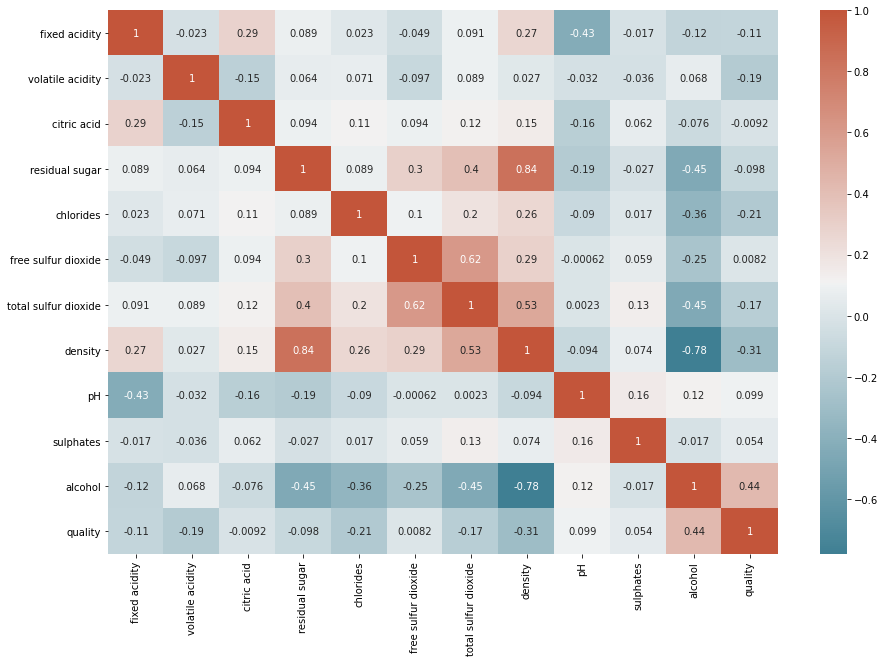

In [ ]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    3838
1    1060
Name: goodquality, dtype: int64

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       963
           1       0.58      0.57      0.58       262

    accuracy                           0.82      1225
   macro avg       0.73      0.73      0.73      1225
weighted avg       0.82      0.82      0.82      1225



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.53      0.63       262

    accuracy                           0.86      1225
   macro avg       0.82      0.74      0.77      1225
weighted avg       0.86      0.86      0.85      1225



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       963
           1       0.52      0.35      0.42       262

    accuracy                           0.79      1225
   macro avg       0.68      0.63      0.65      1225
weighted avg       0.77      0.79      0.78      1225



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       963
           1       0.68      0.39      0.50       262

    accuracy                           0.83      1225
   macro avg       0.77      0.67      0.70      1225
weighted avg       0.82      0.83      0.81      1225



In [ ]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       963
           1       0.66      0.39      0.49       262

    accuracy                           0.83      1225
   macro avg       0.75      0.67      0.69      1225
weighted avg       0.81      0.83      0.81      1225



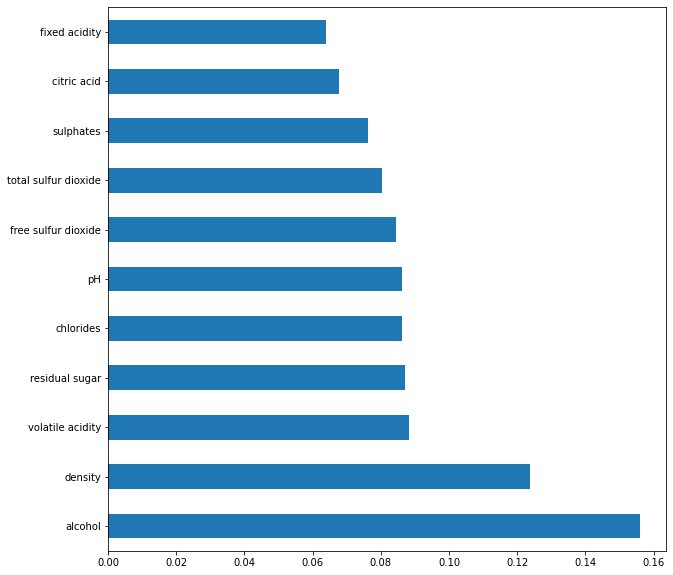

In [ ]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

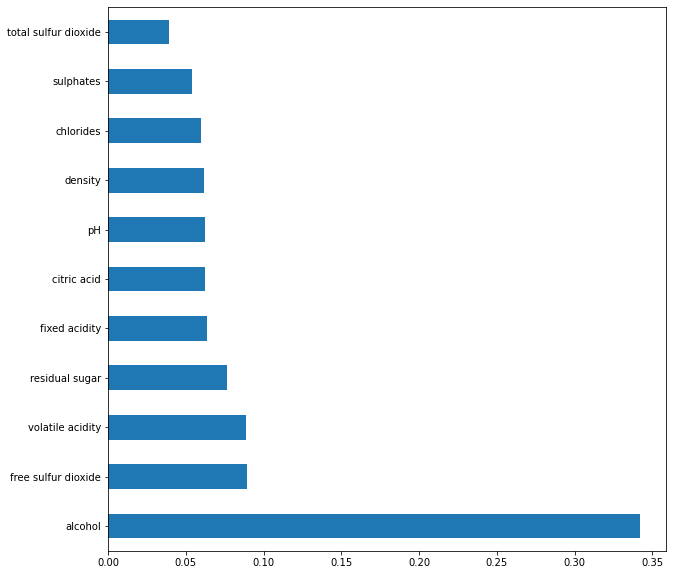

In [ ]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.000000,3838.0
mean,6.890594,0.281802,0.336438,6.703478,0.047875,35.517327,141.982934,0.994474,3.180847,0.487004,10.265215,5.519802,0.0
std,0.860108,0.102293,0.129959,5.225048,0.023548,17.787825,44.145402,0.002894,0.148414,0.108167,1.100576,0.604905,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.0
25%,6.300000,0.220000,0.260000,1.700000,0.037000,23.000000,111.000000,0.992320,3.080000,0.410000,9.400000,5.000000,0.0
50%,6.800000,0.270000,0.320000,6.000000,0.045000,34.000000,140.000000,0.994380,3.170000,0.470000,10.000000,6.000000,0.0
75%,7.400000,0.320000,0.400000,10.400000,0.051000,47.000000,173.000000,0.996570,3.267500,0.540000,11.000000,6.000000,0.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.060000,14.000000,6.000000,0.0
